# Introduction to Machine Learning

## Final Project

## Document Classification

### Ali Mojahed - 9812762554
### Mahya Ehsanimehr - 9812762327


# 1. Download Datasets and Prerequisites

## 1.1. Download Datasets

In [ ]:
!wget -O data.zip https://www.dropbox.com/s/d4kee6t0e9l8e1r/data.zip?dl=0
!unzip data.zip -d /content/data
!mkdir -p /content/model/word2vec/train

--2022-07-05 06:59:38--  https://www.dropbox.com/s/d4kee6t0e9l8e1r/data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/d4kee6t0e9l8e1r/data.zip [following]
--2022-07-05 06:59:38--  https://www.dropbox.com/s/raw/d4kee6t0e9l8e1r/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccfc57de5410deefc5c61ab8a0e.dl.dropboxusercontent.com/cd/0/inline/BoeMtGet5zGsgGwLYlQnMBcMjTT0pB0ynYMYPf5Fbbm5BHlmgyAUuCZ6b-y0pAjaP_Cqbtoc5i421g0yQPrqljBU6W3TuRog68UW88_hUgyHx5YZKqRFwHM5ZLRovgAbjdD90_uakckq32TBilSlb7OILmIRVM-D-08qAA8QsbgSjg/file# [following]
--2022-07-05 06:59:38--  https://uccfc57de5410deefc5c61ab8a0e.dl.dropboxusercontent.com/cd/0/inline/BoeMtGet5zGsgGwLYlQnMBcMjTT0pB0ynYMYPf5Fbbm5BHlmgyAUuCZ6b-y0pAjaP_Cqbtoc5i4

## 1.2. Download glove-wiki-gigaword word vectors

In [ ]:
!wget -O glove_6B_50d_txt.zip https://www.dropbox.com/s/0270psualjeh0vy/glove.6B.50d.zip?dl=0
!unzip glove_6B_50d_txt.zip -d /content/glove_6B_50d_txt


--2022-07-05 06:59:44--  https://www.dropbox.com/s/0270psualjeh0vy/glove.6B.50d.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0270psualjeh0vy/glove.6B.50d.zip [following]
--2022-07-05 06:59:44--  https://www.dropbox.com/s/raw/0270psualjeh0vy/glove.6B.50d.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc04b3e2fc44df958464d0f383d7.dl.dropboxusercontent.com/cd/0/inline/Bofh9K1C4TdlStz96smtoEm-Yimtp04iSjp_kMmUHkdRdBAO4QcCWjTle5O7NyExKuPMSUqr848ju4LAHXAf7iSltjcCJi7nUPaBxRFTIIybE5eDKwO0v7xDRgyrZ8W_hCfBiZ4F5blpvjN9Kzh3znb36LRfE-FKyoA71An8-GUeXQ/file# [following]
--2022-07-05 06:59:45--  https://uc04b3e2fc44df958464d0f383d7.dl.dropboxusercontent.com/cd/0/inline/Bofh9K1C4TdlStz96smtoEm-Yimtp04iSjp_kMmUHkdRdBAO4Qc

## 1.3. Download nltk modules

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# 2. Importing Common Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader

# 3. Read Train and Test Datasets

In [ ]:
train_data = pd.read_csv('/content/data/dataset/train.csv')
test_data = pd.read_csv('/content/data/dataset/test.csv')

In [ ]:
result_accuracy = []
result_accuracy_label = []
WV_SIZE = 50
OUTPUT_FOLDER = '/content/model/word2vec/train/'
word2vec_filename = OUTPUT_FOLDER + 'train_review_word2vec.csv'

# 4. Preprocessing

In [ ]:
extra_punct = [
    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&',
    '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']

In [ ]:
class Preprocessor():
  def __init__(self):
    self.stopwords = nltk.corpus.stopwords.words('english')
    self.wordnet_lemmatizer = WordNetLemmatizer()


  def remove_extra_space(self, text):
    text = text.replace('\\t', ' ')
    text = text.replace('\\n', ' ')
    return text

  def remove_url(self, text):
    return re.sub(r"http\S+", " ", text)

  def remove_punctuation(self, text):
    punctuationfree = ""
    for i in text:
      if i in string.punctuation or i in extra_punct:
        punctuationfree += " "
      else:
        punctuationfree += i
    return punctuationfree

  def tokenization(self, text):
    text = text.replace('\t', ' ')
    text = text.replace('\n', ' ')
    tokens = text.split(' ')
    if '' in tokens:
      tokens.remove('')
    return tokens

  def remove_stopwords(self, text):
    output= [i for i in text if i not in self.stopwords]
    return output

  def lemmatizer(self, text):
    lemm_text = [self.wordnet_lemmatizer.lemmatize(word) for word in text]
    if '' in lemm_text:
      lemm_text = [value for value in lemm_text if value != '']

    return lemm_text

  def join_sent(self, text):
    return " ".join(text)

In [ ]:
def preprocess_documents(data, source_col, target_col):
  processor = Preprocessor()
  data[source_col + '_extra_space'] = data[source_col].apply(lambda x:processor.remove_extra_space(x))

  data[source_col + '_no_url'] = data[source_col + '_extra_space'].apply(lambda x:processor.remove_url(x))

  data[source_col + '_no_punc'] = data[source_col + '_no_url'].apply(lambda x:processor.remove_punctuation(x))
  data[source_col + '_lower'] = data[source_col + '_no_punc'].apply(lambda x: x.lower())

  data[source_col + '_lower'].replace('', np.nan, inplace=True)
  data = data.dropna()

  data[source_col + '_tokenized'] = data[source_col + '_lower'] .apply(lambda x: processor.tokenization(x))
  data[source_col + '_no_stopword'] = data[source_col + '_tokenized'].apply(lambda x: processor.remove_stopwords(x))
  data[target_col] = data[source_col + '_no_stopword'].apply(lambda x: processor.lemmatizer(x))
  data[source_col + '_clean'] = data[source_col + '_no_stopword'].apply(lambda x: processor.join_sent(x))

  return data

In [ ]:
train_data = preprocess_documents(train_data, 'Comment', 'msg_lemmatized')
test_data = preprocess_documents(test_data, 'Comment', 'msg_lemmatized')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['topic_labels'] = label_encoder.fit_transform(train_data['Topic'])
test_data['topic_labels'] = label_encoder.transform(test_data['Topic'])

# 5. Make a Word2Vec Model

In [ ]:
def build_word2vec_from_pretrained(sentences, wv_size, w2v_formant_fn):
  model = Word2Vec(size=wv_size, min_count=1)
  model.build_vocab(sentences)
  total_examples = model.corpus_count

  pretrained_w2v = KeyedVectors.load_word2vec_format(w2v_formant_fn, binary=False)
  model.build_vocab([list(pretrained_w2v.vocab.keys())], update=True)

  model.intersect_word2vec_format(w2v_formant_fn, binary=False, lockf=1.0)
  model.train(sentences, total_examples=total_examples, epochs=model.iter)

  return model

In [ ]:
sentences = train_data['msg_lemmatized'].values
test_sentences = test_data['msg_lemmatized'].values
word2vec_model = build_word2vec_from_pretrained(np.concatenate((sentences, test_sentences), axis=0), 50, "/content/glove_6B_50d_txt/glove.6B.50d.txt")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
def generate_w2v_vector_file(data, target_col, word2vec_filename, w2v_model):
  with open(word2vec_filename, 'w') as word2vec_file:
      for index, row in data.iterrows():
          # print(row['msg_lemmatized'])
          model_vector = (np.mean([w2v_model[token] for token in row[target_col]], axis=0)).tolist()
          if index == 0:
              header = ",".join(str(ele) for ele in range(WV_SIZE))
              word2vec_file.write(header)
              word2vec_file.write("\n")
          # Check if the line exists else it is vector of zeros
          if type(model_vector) is list:
              line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
          else:
              line1 = ",".join([str(0) for i in range(WV_SIZE)])
          word2vec_file.write(line1)
          word2vec_file.write('\n')

In [ ]:
generate_w2v_vector_file(train_data, 'msg_lemmatized', word2vec_filename, word2vec_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# 6. Classification Only with Word2Vec Embedding

In [ ]:
from sklearn.tree import DecisionTreeClassifier
word2vec_df = pd.read_csv(word2vec_filename)
dtc_word2vec = DecisionTreeClassifier()
dtc_word2vec = dtc_word2vec.fit(word2vec_df, train_data['topic_labels'])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

test_features_word2vec = []
for index, row in test_data.iterrows():
  model_vector = np.mean([word2vec_model[token] for token in row['msg_lemmatized']], axis=0)
  if type(model_vector) is list:
    test_features_word2vec.append(model_vector)
  else:
    test_features_word2vec.append(np.array([0 for i in range(WV_SIZE)]))

test_predictions_word2vec = dtc_word2vec.predict(test_features_word2vec)
print(classification_report(test_data['topic_labels'],test_predictions_word2vec))
result_accuracy.append(accuracy_score(test_data['topic_labels'], test_predictions_word2vec))
result_accuracy_label.append('only-word2vec-mean')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       614
           1       0.32      1.00      0.48       506
           2       0.00      0.00      0.00       466

    accuracy                           0.32      1586
   macro avg       0.11      0.33      0.16      1586
weighted avg       0.10      0.32      0.15      1586



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in 

# 7. Classification Only with Bag-of-Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

vect = CountVectorizer(max_features= None)
X_train_dtm = vect.fit_transform(train_data['Comment_clean'].values)
X_test_dtm = vect.transform(test_data['Comment_clean'].values)

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC().fit(X_train_dtm, train_data['topic_labels'])
y_pred = svm.predict(X_test_dtm)
print(classification_report(test_data['topic_labels'],y_pred))
result_accuracy.append(accuracy_score(test_data['topic_labels'], y_pred))
result_accuracy_label.append('only-bag-of-words')

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       614
           1       0.76      0.76      0.76       506
           2       0.78      0.79      0.78       466

    accuracy                           0.78      1586
   macro avg       0.78      0.78      0.78      1586
weighted avg       0.79      0.78      0.79      1586



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# 8. Classification with Combined Prediction of two Models

In [ ]:
from tqdm import tqdm
import gc

def load_vector_lookup(embeddings_index):

    emb_ind = {}
    for i, vec in tqdm(enumerate(embeddings_index.wv.vectors)):
        emb_ind[embeddings_index.wv.index2word[i]] = vec
    del embeddings_index
    gc.collect()
    return emb_ind

In [ ]:
vector_lookup  = load_vector_lookup(word2vec_model)
null_vector = vector_lookup['the']

def make_bov(sentence):
  sent_vec = np.zeros((50))
  sentence = sentence.split()
  sent_length = len(sentence) + 1
  for word in sentence:
      try:
          sent_vec += vector_lookup[word.lower()]
      except:
          sent_vec += null_vector
  sent_vec /= sent_length
  return sent_vec

402299it [00:00, 827532.85it/s]


In [ ]:
class Word2VecDecisionTreeClassifier(DecisionTreeClassifier):
  def __init__(
      self,
      *,
      criterion="gini",
      splitter="best",
      max_depth=None,
      min_samples_split=2,
      min_samples_leaf=1,
      min_weight_fraction_leaf=0.0,
      max_features=None,
      random_state=None,
      max_leaf_nodes=None,
      min_impurity_decrease=0.0,
      class_weight=None,
      ccp_alpha=0.0,
  ):
    super().__init__(
              criterion=criterion,
              splitter=splitter,
              max_depth=max_depth,
              min_samples_split=min_samples_split,
              min_samples_leaf=min_samples_leaf,
              min_weight_fraction_leaf=min_weight_fraction_leaf,
              max_features=max_features,
              max_leaf_nodes=max_leaf_nodes,
              class_weight=class_weight,
              random_state=random_state,
              min_impurity_decrease=min_impurity_decrease,
              ccp_alpha=ccp_alpha,
    )

  def fit(self, X, y, sample_weight=None, check_input=True):
    # global word2vec_filename
    # X = pd.read_csv(word2vec_filename)
    global train_data
    train_features = np.array([make_bov(sent) for sent in train_data["Comment_clean"].values])
    super().fit(train_features, y, sample_weight, check_input)
    return self

  def predict(self, X, check_input=True):
    # global test_features_word2vec
    # X = test_features_word2vec
    global test_data
    test_features = np.array([make_bov(sent) for sent in test_data["Comment_clean"].values])
    return super().predict(test_features, check_input)

  def predict_proba(self, X):
    global test_features_word2vec
    X = test_features_word2vec
    return super().predict_proba(X)

In [ ]:
class BagOfWordSVM(LinearSVC):
  def __init__(self,
        penalty="l2",
        loss="squared_hinge",
        *,
        dual=True,
        tol=1e-4,
        C=1.0,
        multi_class="ovr",
        fit_intercept=True,
        intercept_scaling=1,
        class_weight=None,
        verbose=0,
        random_state=None,
        max_iter=1000,
  ):
    super().__init__(
        penalty=penalty,
          loss=loss,
          dual=dual,
          tol=tol,
          C=C,
          multi_class=multi_class,
          fit_intercept=fit_intercept,
          intercept_scaling=intercept_scaling,
          class_weight=class_weight,
          verbose=verbose,
          random_state=random_state,
          max_iter=max_iter
    )

  def fit(self, X, y, sample_weight=None):
    self.vect = CountVectorizer(max_features= 5000)
    X = self.vect.fit_transform(X['Comment_clean'].values)
    super().fit(X, y, sample_weight)
    return self

  def predict(self, X):
    X = self.vect.transform(X['Comment_clean'].values)
    return super().predict(X)

  def predict_proba(self, X):
    X = self.vect.transform(X['Comment_clean'].values)
    return super().predict_proba(X)

In [ ]:
from sklearn.ensemble import VotingClassifier
class VottingClassifierWrapper(VotingClassifier):
  def __init__(self,
        estimators,
        *,
        voting="hard",
        weights=None,
        n_jobs=None,
        flatten_transform=True,
        verbose=False):
    super().__init__(
        estimators,
        voting=voting,
        weights=weights,
        n_jobs=n_jobs,
        flatten_transform=flatten_transform,
        verbose=verbose
    )

  def predict(self, X):
    predictions = self._predict(X)
    maj = np.apply_along_axis(
        lambda x: np.argmax(np.bincount(x, weights=self._weights_not_none)),
        axis=1,
        arr=predictions,
    )
    maj = self.le_.inverse_transform(maj)
    return maj


  def predict_proba(self, X):
    avg = np.average(self._collect_probas(X), axis=0, weights=self._weights_not_none)
    return avg


In [ ]:
from sklearn.pipeline import Pipeline

est_w2v = Word2VecDecisionTreeClassifier()
est_bow = BagOfWordSVM()

combined = VottingClassifierWrapper(estimators=[('w2v', est_w2v), ('bow', est_bow)], voting='hard', weights=['1', '1'])
combined = combined.fit(train_data, train_data['topic_labels'])

y_pred = combined.predict(test_data)
print(classification_report(test_data['topic_labels'],y_pred))
result_accuracy.append(accuracy_score(test_data['topic_labels'], y_pred))
result_accuracy_label.append('combined-w2v-bow')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.69      0.86      0.77       614
           1       0.62      0.67      0.64       506
           2       0.88      0.51      0.64       466

    accuracy                           0.70      1586
   macro avg       0.73      0.68      0.69      1586
weighted avg       0.72      0.70      0.69      1586



# 9. Bag-of-Vectors (BoV)

In [ ]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 30)

train_features = np.array([make_bov(sent) for sent in train_data["Comment_clean"].values])
test_features = np.array([make_bov(sent) for sent in test_data["Comment_clean"].values])

train_features_svd = tsvd.fit_transform(train_features)
test_features_svd = tsvd.transform(test_features)

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC().fit(train_features, train_data['topic_labels'])
y_pred = svm.predict(test_features)
print(classification_report(test_data['topic_labels'],y_pred))
result_accuracy.append(accuracy_score(test_data['topic_labels'], y_pred))
result_accuracy_label.append('mean_w2v')

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       614
           1       0.69      0.75      0.72       506
           2       0.81      0.73      0.76       466

    accuracy                           0.76      1586
   macro avg       0.76      0.76      0.76      1586
weighted avg       0.76      0.76      0.76      1586



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC().fit(train_features_svd, train_data['topic_labels'])
y_pred = svm.predict(test_features_svd)
print(classification_report(test_data['topic_labels'],y_pred))
result_accuracy.append(accuracy_score(test_data['topic_labels'], y_pred))
result_accuracy_label.append('mean-w2v-svd')

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       614
           1       0.70      0.73      0.71       506
           2       0.77      0.74      0.76       466

    accuracy                           0.76      1586
   macro avg       0.76      0.75      0.75      1586
weighted avg       0.76      0.76      0.76      1586



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# 10. TF-IDF and BoV

In [ ]:
train_data['Comment_clean'].head()

0    things might negative  frequency dependent sel...
1    hard believe exist particulars detect anything...
2                                                 bees
3    medication technician alot drugs liver  probab...
4                                  cesium pretty metal
Name: Comment_clean, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1))
tfidf_matrix =  tf.fit_transform(train_data['Comment_clean'])
feature_names = tf.get_feature_names()
sentences_tf_idf = []
docs = train_data['Comment_clean'].values.shape[0]
for doc in range(docs):
  feature_index = tfidf_matrix[doc,:].nonzero()[1]
  tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
  sentece_tf_idf = dict()
  for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    sentece_tf_idf[w] = s
  sentences_tf_idf.append(sentece_tf_idf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def make_bov_tf_idf(sentence, index):
  # print(sentence)
  # sentence = sentence['Comment_clean'].values[0]
  sent_vec = np.zeros((50))
  sentence = sentence.split()
  tf_idf = sentences_tf_idf[index]
  sent_length = len(sentence) + 1
  for word in sentence:
      try:
          sent_vec += vector_lookup[word.lower()] * tf_idf[word.lower()]
      except:
          sent_vec += null_vector
  sent_vec /= sent_length
  return sent_vec

In [ ]:
train_feat = np.zeros((train_data.values.shape[0], 50))
for index, row in train_data.iterrows():
  train_feat[index, :] = make_bov_tf_idf(row['Comment_clean'], index)

test_feat = np.zeros((test_data.values.shape[0], 50))
for index, row in test_data.iterrows():
  test_feat[index, :] = make_bov_tf_idf(row['Comment_clean'], index)

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC().fit(train_feat, train_data['topic_labels'])
y_pred = svm.predict(test_feat)
print(classification_report(test_data['topic_labels'],y_pred))
result_accuracy.append(accuracy_score(test_data['topic_labels'], y_pred))
result_accuracy_label.append('combine-tfidf-w2v-mean')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       614
           1       0.00      0.00      0.00       506
           2       0.29      1.00      0.45       466

    accuracy                           0.29      1586
   macro avg       0.10      0.33      0.15      1586
weighted avg       0.09      0.29      0.13      1586



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
count = CountVectorizer(max_features=None)

count_matrix =  count.fit_transform(train_data['Comment_clean'])
feature_names = count.get_feature_names()
sentences_count = []
docs = train_data['Comment_clean'].values.shape[0]
for doc in range(docs):
  feature_index = count_matrix[doc,:].nonzero()[1]
  count_scores = zip(feature_index, [count_matrix[doc, x] for x in feature_index])
  sentece_count = dict()
  for w, s in [(feature_names[i], s) for (i, s) in count_scores]:
    sentece_count[w] = s
  sentences_count.append(sentece_tf_idf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def make_bov_count(sentence, index):
  # print(sentence)
  # sentence = sentence['Comment_clean'].values[0]
  sent_vec = np.zeros((50))
  sentence = sentence.split()
  count = sentences_count[index]
  sent_length = len(sentence) + 1
  for word in sentence:
      try:
          sent_vec += vector_lookup[word.lower()] * count[word.lower()] * 100
      except:
          sent_vec += null_vector
  sent_vec /= sent_length
  return sent_vec

In [ ]:
train_feat = np.zeros((train_data.values.shape[0], 50))
for index, row in train_data.iterrows():
  train_feat[index, :] = make_bov_count(row['Comment_clean'], index)

test_feat = np.zeros((test_data.values.shape[0], 50))
for index, row in test_data.iterrows():
  test_feat[index, :] = make_bov_count(row['Comment_clean'], index)

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC().fit(train_feat, train_data['topic_labels'])
y_pred = svm.predict(test_feat)
print(classification_report(test_data['topic_labels'],y_pred))
result_accuracy.append(accuracy_score(test_data['topic_labels'], y_pred))
result_accuracy_label.append('combine-frequency-w2v-mean')

              precision    recall  f1-score   support

           0       0.39      1.00      0.56       614
           1       0.00      0.00      0.00       506
           2       0.00      0.00      0.00       466

    accuracy                           0.39      1586
   macro avg       0.13      0.33      0.19      1586
weighted avg       0.15      0.39      0.22      1586



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

# 11. Bag-of-Words Using Clustered Word2Vecs

In [ ]:
def get_w2vs_of_sentence(sentence):
  l = []
  sent_vec = np.zeros((50))
  sentence = sentence.split()
  for word in sentence:
      try:
          l.append(vector_lookup[word.lower()])
      except:
          l.append(null_vector)

  return np.array(l)

In [ ]:
from sklearn.cluster import AgglomerativeClustering


complete_link = AgglomerativeClustering(linkage='complete')
complete_link = complete_link.fit(word2vec_df.iloc[:, 1:].values)




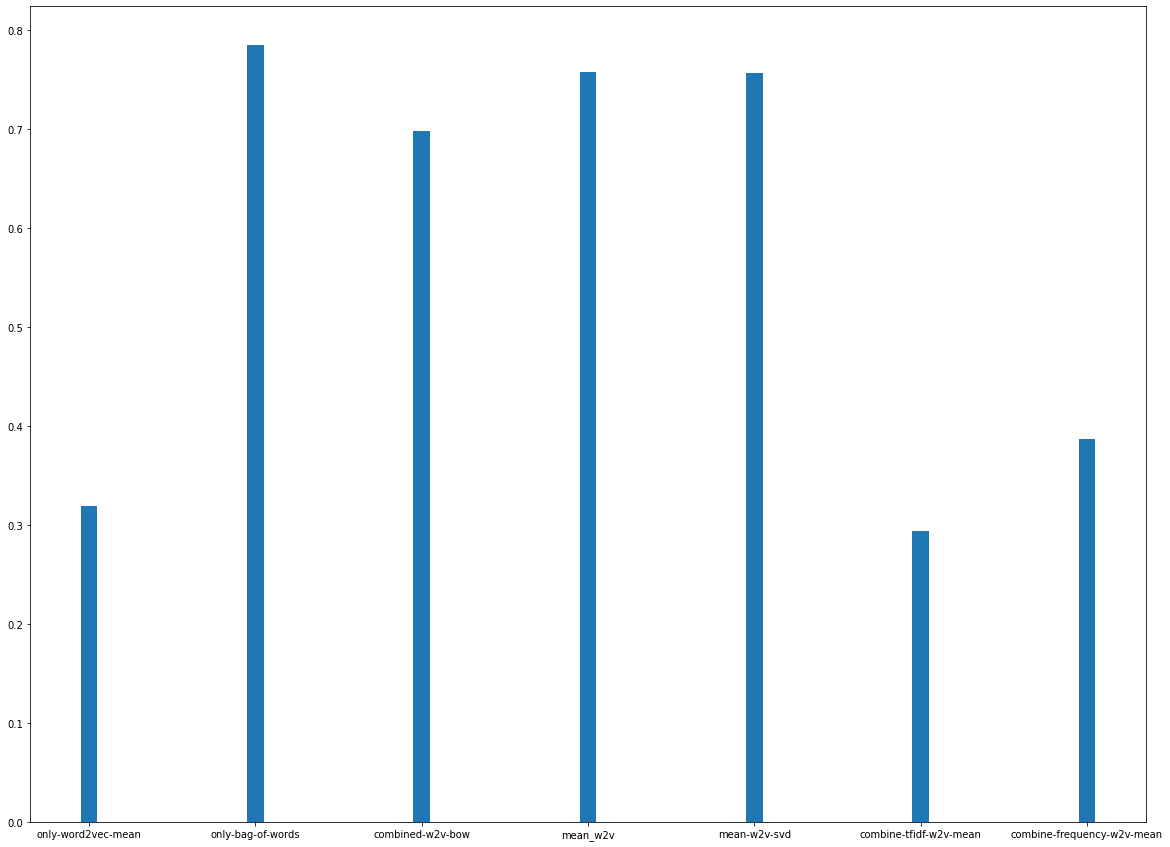

In [ ]:
fig = plt.figure(figsize = (20, 15))
plt.bar(result_accuracy_label,result_accuracy, width = 0.1)
plt.show()